In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import itk
from itkwidgets import view
from skimage.io import imread

# Region Growig

#### Connected Threshold

![image](1.jpg)

Viewer(cmap=['Grayscale'], geometries=[], gradient_opacity=0.5, point_sets=[], rendered_image=<itk.itkImagePyt…

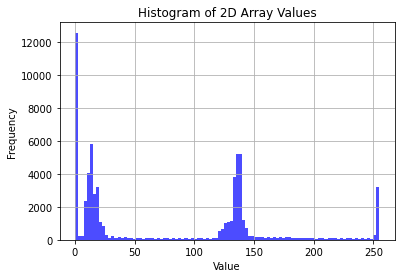

In [3]:
file_name = 'cthead1.png'
if not os.path.exists(file_name):
    print("No File")
image = itk.imread(file_name,itk.F)

# smoothed = itk.CurvatureFlowImageFilter(image, time_step=0.125,number_of_iterations=5)


outputnp = np.array(image)

# Flatten the 2D array to a 1D array
flattened_data = outputnp.ravel()

# Create a histogram
plt.hist(flattened_data, bins=100, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 2D Array Values')
plt.grid(True)



viewer =  view(image, gradient_opacity=0.5)
viewer.cmap = ['Grayscale',]
viewer



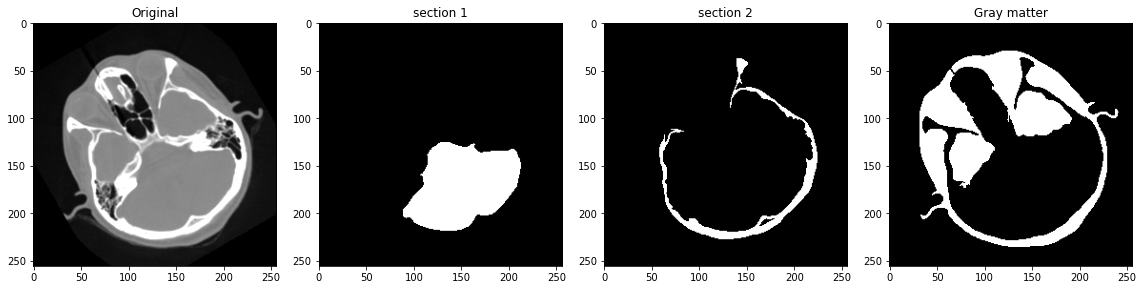

In [4]:
seeds = [[146, 180], [157,219], [56,84]]
lu_thresholds = [(100,160), (210,255), (100,160)]


outputs = [] 
for i in range(3):
    thresh = itk.ConnectedThresholdImageFilter(image,
                                            lower=lu_thresholds[i][0],
                                            upper=lu_thresholds[i][1],
                                            replace_value=255,
                                            seed=seeds[i])
    outputs.append(thresh)


fig, axes = plt.subplots(1, 4, figsize=(16, 16))

axes[0].imshow(image,cmap="gray")
axes[0].set_title('Original')

axes[1].imshow(outputs[0],cmap="gray")
axes[1].set_title('section 1')

axes[2].imshow(outputs[1],cmap="gray")
axes[2].set_title('section 2')

axes[3].imshow(outputs[2],cmap="gray")
axes[3].set_title('Gray matter')

plt.tight_layout()
plt.show()

#### Otsu Segmentation

![image](2.jpg)

https://www.baeldung.com/cs/otsu-segmentation

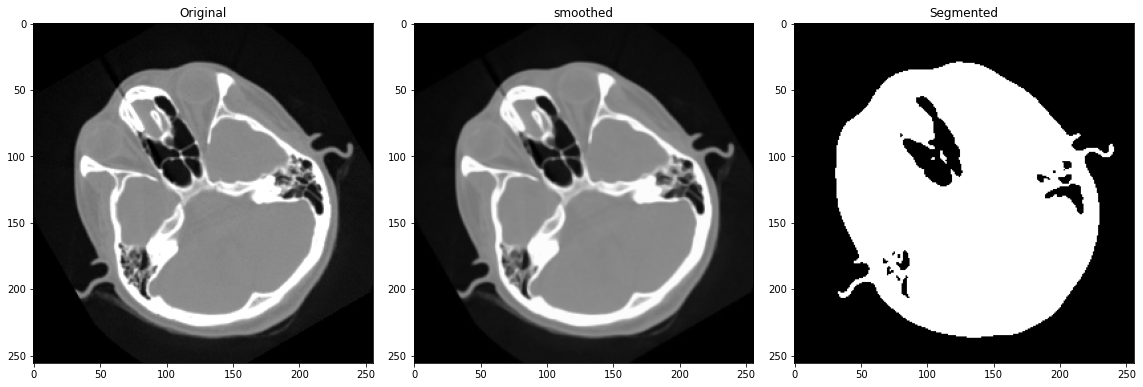

In [13]:
image = itk.imread('cthead1.png',itk.F)

smoothed = itk.CurvatureFlowImageFilter(image, time_step=0.125,number_of_iterations=5)

segmented = itk.OtsuThresholdImageFilter(smoothed,
                                        outside_value=255,
                                        inside_value=0)

fig, axes = plt.subplots(1, 3, figsize=(16, 16))

axes[0].imshow(image,cmap="gray")
axes[0].set_title('Original')

axes[1].imshow(smoothed,cmap="gray")
axes[1].set_title('smoothed')

axes[2].imshow(segmented,cmap="gray")
axes[2].set_title('Segmented')

plt.tight_layout()
plt.show()


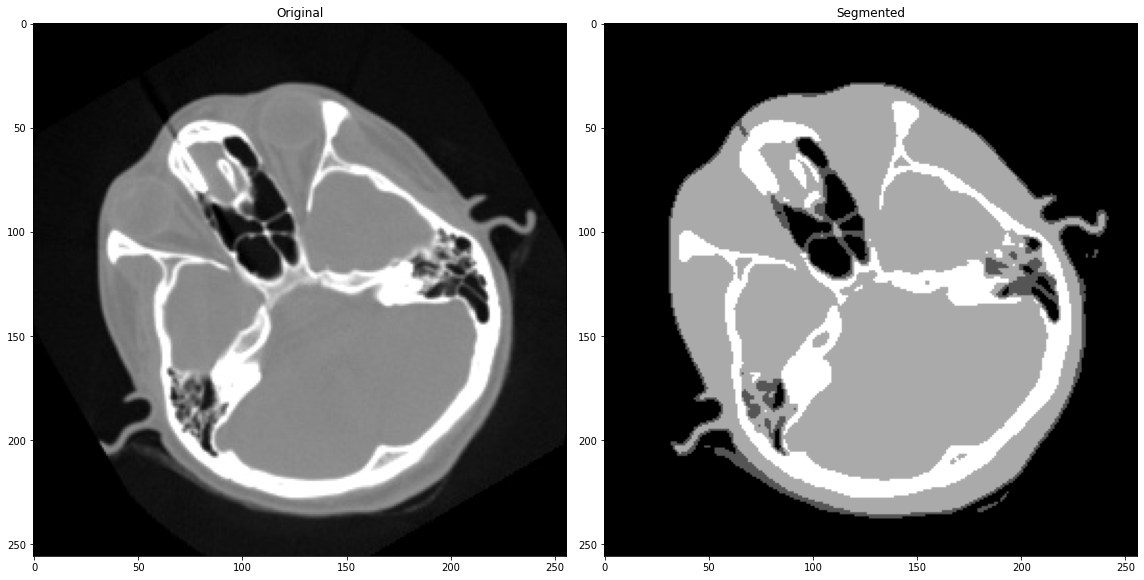

In [21]:
image = itk.imread('cthead1.png',itk.F)

smoothed = itk.CurvatureFlowImageFilter(image, time_step=0.125,number_of_iterations=5)

Segmented = itk.OtsuMultipleThresholdsImageFilter(smoothed,
                                                number_of_histogram_bins = 255,
                                                number_of_thresholds=3,
                                                label_offset=50)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))

axes[0].imshow(image,cmap="gray")
axes[0].set_title('Original')

axes[1].imshow(Segmented,cmap="gray")
axes[1].set_title('Segmented')


plt.tight_layout()
plt.show()

#### Neighborhood Connected

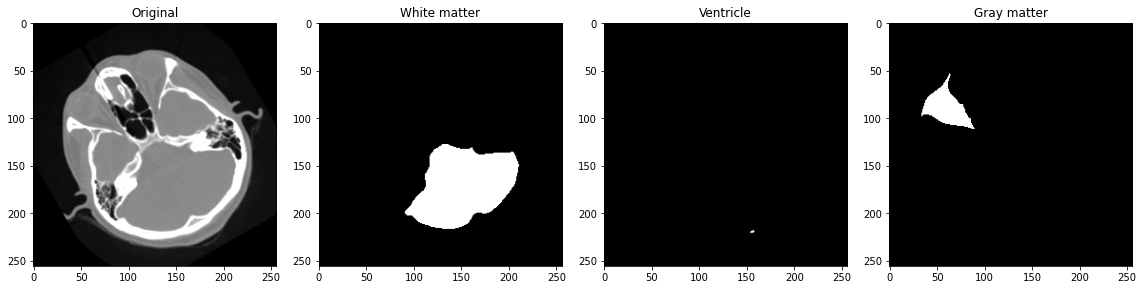

In [16]:
image = itk.imread('cthead1.png',itk.F)

smoothed = itk.CurvatureFlowImageFilter(image, time_step=0.125,number_of_iterations=5)

seeds = [[146, 180], [157,219], [56,84]]
lu_thresholds = [(100,160), (210,255), (100,160)]

outputs = []
for i in range(3):
    thresh = itk.NeighborhoodConnectedImageFilter(smoothed,
                                            radius=[2,2],
                                            lower=lu_thresholds[i][0],
                                            upper=lu_thresholds[i][1],
                                            replace_value=255,
                                            seed=seeds[i])
    outputs.append(thresh)


fig, axes = plt.subplots(1, 4, figsize=(16, 16))

axes[0].imshow(image,cmap="gray")
axes[0].set_title('Original')

axes[1].imshow(outputs[0],cmap="gray")
axes[1].set_title('White matter')

axes[2].imshow(outputs[1],cmap="gray")
axes[2].set_title('Ventricle')

axes[3].imshow(outputs[2],cmap="gray")
axes[3].set_title('Gray matter')

plt.tight_layout()
plt.show()

#### Confidence Connected

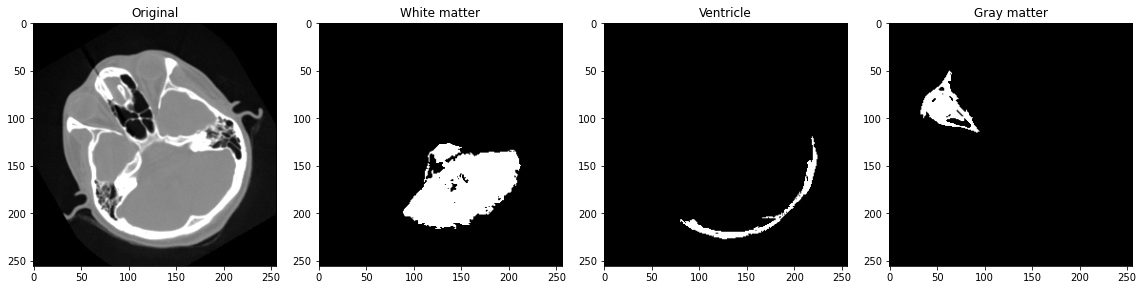

In [17]:
image = itk.imread('cthead1.png',itk.F)

smoothed = itk.CurvatureFlowImageFilter(image, time_step=0.125,number_of_iterations=5)

seeds = [[146, 180], [157,219], [56,84]]

outputs = []
for i in range(3):
    thresh = itk.ConfidenceConnectedImageFilter(smoothed,
                                            multiplier=2.5,
                                            number_of_iterations=5,
                                            initial_neighborhood_radius=2,
                                            replace_value=255,
                                            seed=seeds[i])
    outputs.append(thresh)


fig, axes = plt.subplots(1, 4, figsize=(16, 16))

axes[0].imshow(image,cmap="gray")
axes[0].set_title('Original')

axes[1].imshow(outputs[0],cmap="gray")
axes[1].set_title('White matter')

axes[2].imshow(outputs[1],cmap="gray")
axes[2].set_title('Ventricle')

axes[3].imshow(outputs[2],cmap="gray")
axes[3].set_title('Gray matter')

plt.tight_layout()
plt.show()

#### Isolated Connected

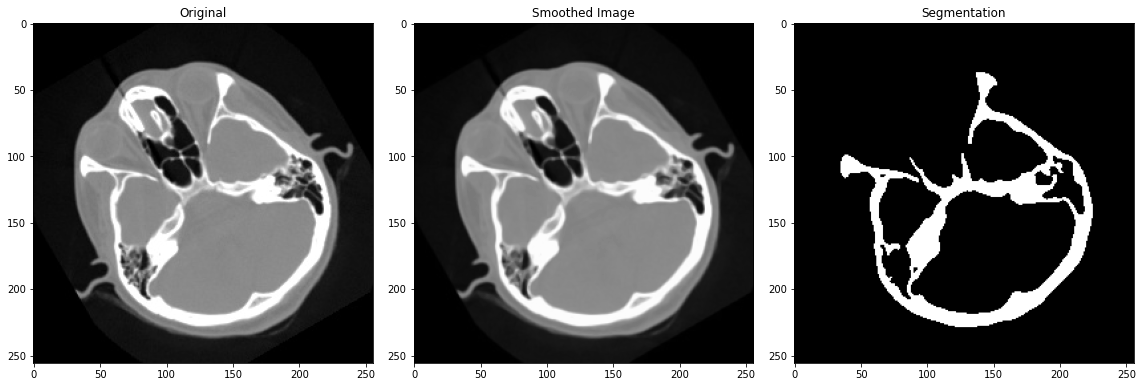

In [18]:
image = itk.imread('cthead1.png',itk.F)

smoothed = itk.CurvatureFlowImageFilter(image, time_step=0.125,number_of_iterations=5)


thresh =  itk.NeighborhoodConnectedImageFilter(smoothed,
                                        lower=150,
                                        seed1=[61,140],
                                        seed2=[63,43],
                                        replace_value=255)


fig, axes = plt.subplots(1, 3, figsize=(16, 16))

axes[0].imshow(image,cmap="gray")
axes[0].set_title('Original')

axes[1].imshow(smoothed,cmap="gray")
axes[1].set_title('Smoothed Image')

axes[2].imshow(thresh,cmap="gray")
axes[2].set_title('Segmentation')

plt.tight_layout()
plt.show()

 # Segmentation based on watersheds

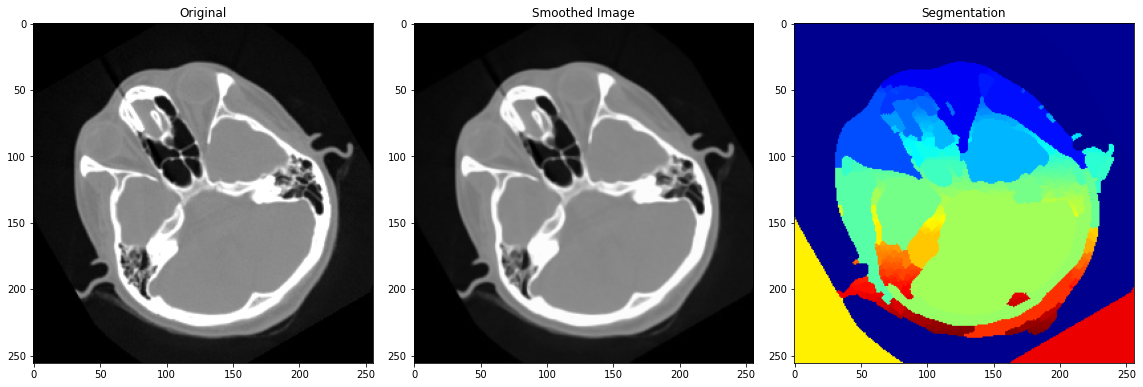

In [20]:
Dimension = 2

FloatPixelType = itk.ctype("float")
FloatImageType = itk.Image[FloatPixelType, Dimension]

reader = itk.ImageFileReader[FloatImageType].New()
reader.SetFileName('cthead1.png')

smoothed = itk.CurvatureFlowImageFilter(reader.GetOutput(), time_step=0.125,number_of_iterations=5)

gradientMagnitude = itk.GradientMagnitudeImageFilter.New(Input=smoothed)

watershed = itk.WatershedImageFilter.New(Input=gradientMagnitude.GetOutput())

threshold = 0.001
level = 0.17
watershed.SetThreshold(threshold)
watershed.SetLevel(level)

LabeledImageType = type(watershed.GetOutput())

PixelType = itk.ctype("unsigned char")
RGBPixelType = itk.RGBPixel[PixelType]
RGBImageType = itk.Image[RGBPixelType, Dimension]

ScalarToRGBColormapFilterType = itk.ScalarToRGBColormapImageFilter[
    LabeledImageType, RGBImageType
]
colormapImageFilter = ScalarToRGBColormapFilterType.New()
colormapImageFilter.SetColormap(
    itk.ScalarToRGBColormapImageFilterEnums.RGBColormapFilter_Jet
)
colormapImageFilter.SetInput(watershed.GetOutput())
colormapImageFilter.Update()


fig, axes = plt.subplots(1, 3, figsize=(16, 16))

axes[0].imshow(reader.GetOutput(),cmap="gray")
axes[0].set_title('Original')

axes[1].imshow(smoothed,cmap="gray")
axes[1].set_title('Smoothed Image')

axes[2].imshow(colormapImageFilter.GetOutput())
axes[2].set_title('Segmentation')

plt.tight_layout()
plt.show()
